In [1]:
import pandas as pd

In [2]:
housingdata = pd.read_csv('data.csv')

In [3]:
housingdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housingdata['CHAS '].value_counts()

0    471
1     35
Name: CHAS , dtype: int64

In [6]:
housingdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.280363,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703143,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.618000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CE26395B0>,
      dtype=object)

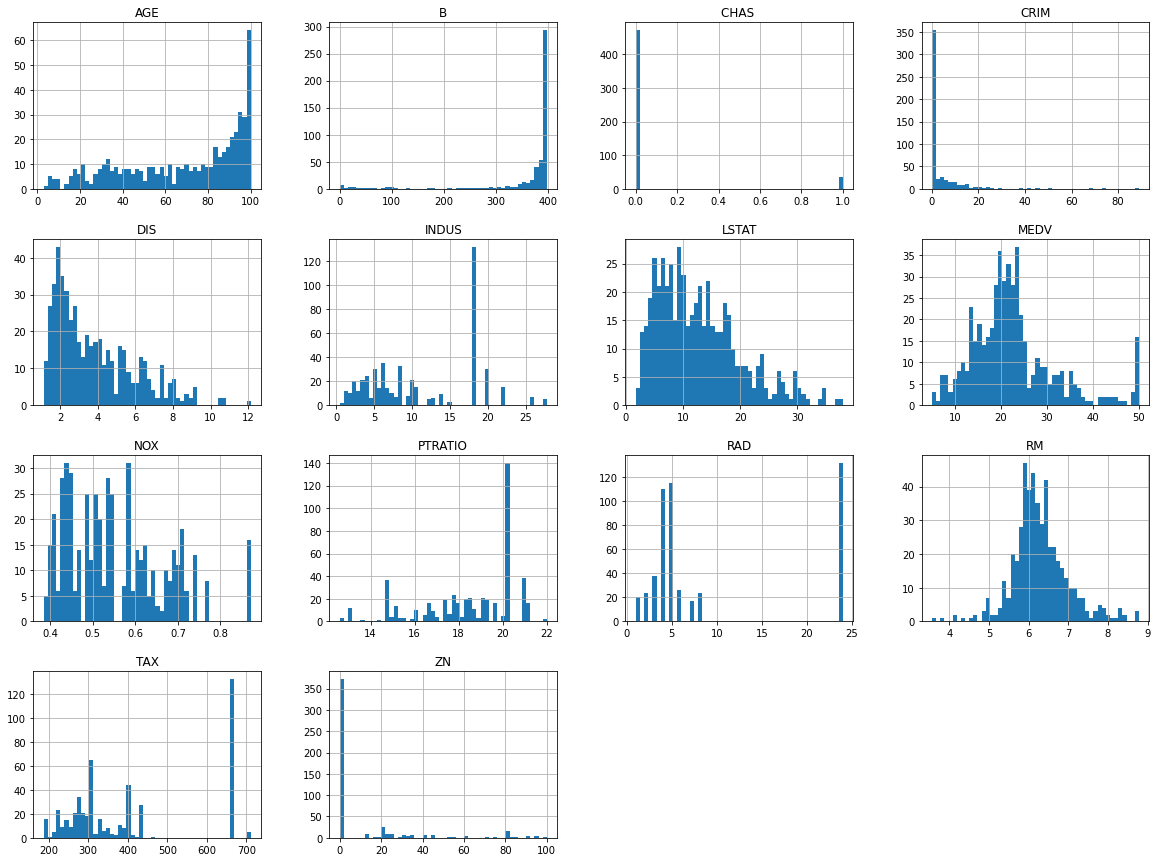

In [9]:
housingdata.hist(bins=50, figsize=(20, 15))

## Train Test Splitting

In [10]:
# Was for the learning
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housingdata, 0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housingdata, test_size=0.2, random_state=42)

In [15]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housingdata, housingdata['CHAS ']):
    strat_train_set = housingdata.loc[train_index]
    strat_test_set = housingdata.loc[test_index]

In [17]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.291307,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.654989,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.167000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.538000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
strat_test_set['CHAS '].value_counts()

0    95
1     7
Name: CHAS , dtype: int64

In [19]:
strat_train_set['CHAS '].value_counts()

0    376
1     28
Name: CHAS , dtype: int64

In [20]:
housingdata = strat_train_set.copy()

## Locking for Correlations

In [21]:
corr_matrix = housingdata.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680027
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CED68B790>,
      dtype=object)

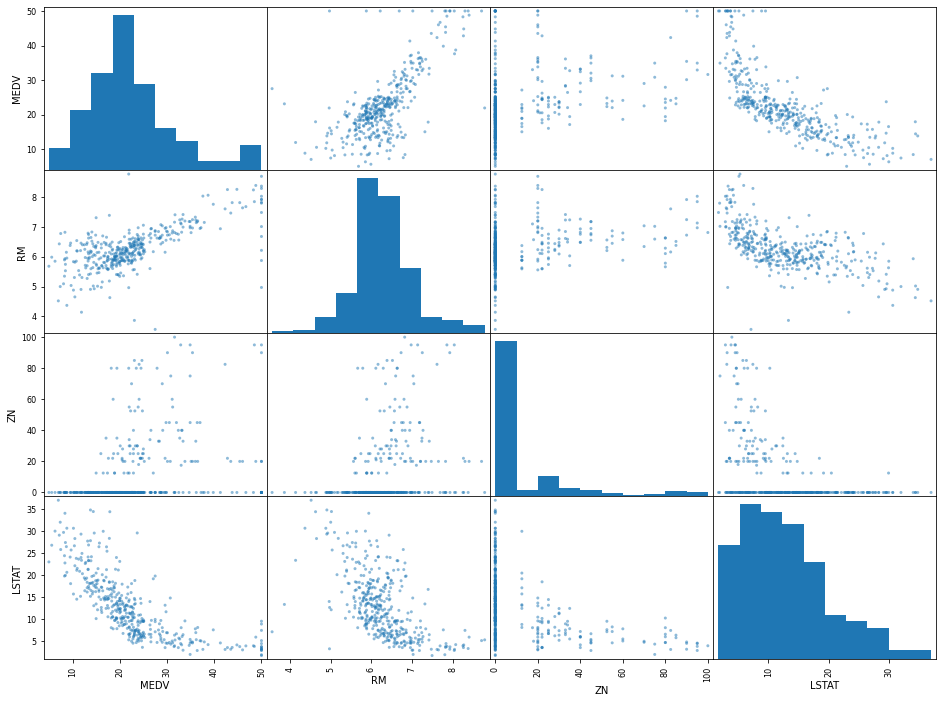

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housingdata[attributes], figsize=(16,12))

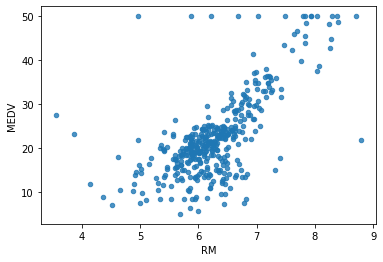

In [23]:
housingdata.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute Combinitions

In [24]:
housingdata["TAXPRM"] = housingdata["TAX"]/housingdata["RM"]

In [25]:
housingdata["TAXPRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXPRM, Length: 404, dtype: float64

In [26]:
housingdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXPRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [27]:
corr_matrix = housingdata.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680027
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXPRM    -0.524359
LSTAT     -0.740494
Name: MEDV, dtype: float64

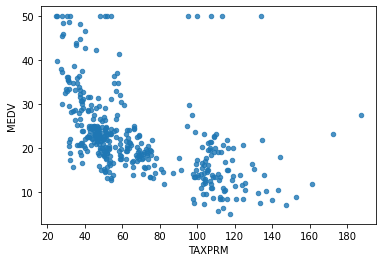

In [28]:
housingdata.plot(kind="scatter", x="TAXPRM", y="MEDV", alpha=0.8)

In [29]:
housingdata = strat_train_set.drop("MEDV", axis=1)
housingdata_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [30]:
# To take care of missing attributes, we've threee options:
# 1> Get rid of the missing data points
# 2> Get rid of the whole attribute
# 3> Set the value to some value (0, mean or median)

In [31]:
# Option 1
a = housingdata.dropna(subset=["RM"])
a.shape

# it remove the null values but the original housing data remaine unchanged and we recive a copy of in a

(400, 13)

In [32]:
# Option 2
housingdata.drop("RM", axis=1).shape

# it removes the RM attribute but original dataframe is unchanged

(404, 12)

In [33]:
# Option 3
# We're fitting the median in place of missing data points
median = housingdata["RM"].median()

In [34]:
median

6.209

In [35]:
housingdata["RM"].fillna(median)
# Note: The original data fram is unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housingdata.shape

(404, 13)

In [37]:
# Before the imputing housing data looks like
# Before we started filling missing attributes
housingdata.describe()

# Here RM's count is: 400 before imputer

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277600,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715543,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
# Doing above thing with sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housingdata)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [40]:
imputer.statistics_.shape

(13,)

In [41]:
X = imputer.transform(housingdata)

In [42]:
housingdata_tr = pd.DataFrame(X, columns=housingdata.columns)

In [43]:
housingdata_tr.describe()

# Here RM's count is: 404, after imputer, we fill the missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276921,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712016,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily three type of objects this library
1. Estimators - It estimates some parameters based on the dataset. Eg. Imputer
It has a fit and transform method
Fit Method - Fits the dataset and calculates internal parameters

2. Transformers - It takes input and return output based on the learnings from fit()
It also has a convenience function called fit_tranform(), which fits and then transform.

3. Predictors - LinearRegression model KNN are the example of predictor.
It has fit() and predict() methods.
It also gives score() fucntion which will evaluate the predictions

## Feature Scalling

When we want all of our features in same numerical range. eg. As our MEDV goes from 10 to 50 and ZN 0 to 100. Some of the ML model performs really well upon same numerical saclling.

Primarily two types of feature scalling methods:
1. Min - max scalling, this is also called Normalization
    (value - min / (min - max))
    Sklearn provides a class called MinMaxScaler for this

2. Standardization
    ((value - mean) / std)
    Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
# ...... we can add as many as we want in out pipeline
    ('std_scaler', StandardScaler())
])

In [45]:
housingdata_num_tr = my_pipeline.fit_transform(housingdata)

In [46]:
housingdata_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [47]:
housingdata_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [48]:
from sklearn.linear_model import LinearRegression
# Trying anothr one
from sklearn.tree import DecisionTreeRegressor
# Trying another one
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housingdata_num_tr, housingdata_labels)

RandomForestRegressor()

In [49]:
some_data = housingdata.iloc[:5]

In [50]:
some_labels = housingdata_labels.iloc[:5]

In [51]:
prepared_data = my_pipeline.transform(some_data)

In [52]:
model.predict(prepared_data)

array([22.517, 25.593, 16.642, 23.403, 23.593])

In [53]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evalulating the model

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
housing_predictions = model.predict(housingdata_num_tr)

In [56]:
mse = mean_squared_error(housingdata_labels, housing_predictions)

In [57]:
rmse = np.sqrt(mse)

In [58]:
rmse

1.169673792004834

In [59]:
# Here the mean error for the LinearRegressor is very high, 23.28628016032237, so that's why we won't use
# For the DecisionTree it does overfit the data and that's why we're getting the mse of 0.0

### Using better evaluating technique - Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housingdata_num_tr, housingdata_labels, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)

In [61]:
rmse_score

array([2.79098113, 2.78493776, 4.40579952, 2.5511944 , 3.58997729,
       2.73220494, 4.51635179, 3.22853234, 2.93873176, 3.02441952])

In [62]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation", scores.std())

In [63]:
print_scores(rmse_score)

Scores:  [2.79098113 2.78493776 4.40579952 2.5511944  3.58997729 2.73220494
 4.51635179 3.22853234 2.93873176 3.02441952]
Mean:  3.2563130465688337
Standard Deviation 0.662296226739149


In [64]:
# Decision Tree
# Mean:  3.969124107936868
# Standard Deviation 0.5567267457675251

In [67]:
# Linear Regressoin
# Mean:  5.025326263156095
# Standard Deviation 1.0631151808849306

In [68]:
# RandomForest Regressor
# Mean:  3.2661950722010182
# Standard Deviation 0.6999361385245859

## Saving the model

In [64]:
from joblib import dump, load
dump(model, 'Graden_Walk.joblib')

['Graden_Walk.joblib']

## Testing the model on test data

In [65]:
X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
print(final_predictions, list(y_test))

[24.496 10.984 25.751 22.224 18.188 14.816 19.668 14.616 31.414 40.85
 19.683 11.492 23.803 28.577 19.603 10.87  31.448 14.281 23.526 18.556
 19.779 17.413 17.277 21.826 18.887 31.388 15.996 32.416  8.903 33.553
 23.916 21.286 23.121 10.581 21.02  11.455 24.514 24.363 23.929 42.545
 24.053 30.102 20.251 21.222 18.585 33.022 44.993 20.005 20.267 21.714
 20.986 14.693 21.122 15.133 24.587 33.303 42.39  29.101 19.468 20.826
 46.821  9.799 18.519 25.9   14.773 33.184 19.909 17.707 19.365 34.174
 25.946 22.832 21.088 22.68  34.657 12.103 15.93  19.88  20.906 21.548
 22.378 21.141 14.35  22.888 20.613 21.279 13.852 21.182 21.508 23.308
 18.83  27.315  7.482 25.971 19.188 28.898 19.924 32.194 14.706 26.426
 21.195 20.345] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [67]:
final_rmse

3.4113021218688124

## Using the model

In [69]:
from joblib import dump, load
model = load('Graden_Walk.joblib')

In [70]:
features = np.array([[-0.43942006,  1.12628155, -3.12165014, -0.27288841, -1.42262747,
       0.8323753721, -3.31238772,  2.62111401, -1.0016859 , -0.232778192 ,
       -0.17491834,  0.41164221, -0.1122091034]])

In [71]:
model.predict(features)

array([24.818])